In [1]:
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt
import pandas as pd
from osc_toolkit import oscillation, delayed_oscillation
from models import *
from functools import partial
from jitcdde import jitcdde, y, t, jitcdde_input
import ipywidgets as widgets
from matplotlib import patches

In [2]:
df_ves_6h_osc = pd.read_csv(r'Data_sets/ves_6h_osc_JACS_ZZ.csv')
cA2_tol = df_ves_6h_osc.loc[0, 'cA2'] + df_ves_6h_osc.loc[0, 'cA']/2
rext = 9
tau = cA2_tol/rext
cmc = 0.058
print(f'Initial cA2: {cA2_tol:.3f} mM, H2O2 input rate: {rext} mM/h, time unit: {tau:.3f} h')

for col in ['TimeA2', 'TimeS', 'TimeA']:
    df_ves_6h_osc[col] /= tau

df_ves_6h_osc['cS'] /= cmc
df_ves_6h_osc['cA'] /= cA2_tol
df_ves_6h_osc['cA2'] /= cA2_tol

Initial cA2: 16.066 mM, H2O2 input rate: 9 mM/h, time unit: 1.785 h


In [36]:
params = np.array([0.25, 15, 0.35, 45, 0])
consts = np.array([0.0036, 2])
delay = np.array([0.01, 0.02])
init_cond = [0.1, 0, 0]
ves_model = delayed_oscillation(delayed_full_model_consumeO, delay, params, consts, init_cond, calc_all_delayed_full_model_consumeO)
ves_model.add_exp_data(df_ves_6h_osc)
ves_model.set_init_cond([0.1, 0, 0])

The species are ['A2', 'S_sum', 'A', 'O']. Please check if the data is in the same order and correct format (time, concentration).


Generating, compiling, and loading C code.
Using default integration parameters.


(<Figure size 500x400 with 2 Axes>,
 array([<Axes: xlabel='Normalized Time', ylabel='Normalized Conc'>,
        <Axes: xlabel='Normalized Time', ylabel='Normalized Conc'>],
       dtype=object))

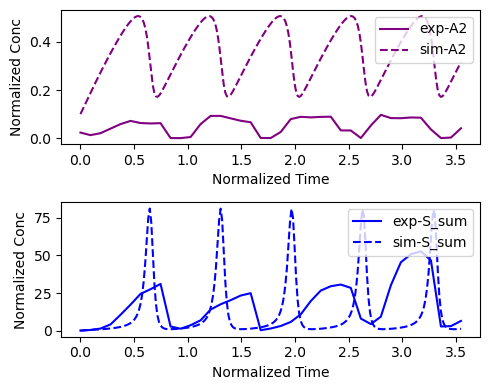

In [37]:
ves_model.plot(exp=True)

In [38]:
ves_model.interactive_plot(ran=15, t=4, step=0.01, exp=True)

interactive(children=(FloatSlider(value=0.25, description='alpha', max=15.25, step=0.01), FloatSlider(value=15…